In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Read data from external CSV
logbook = pd.read_csv(r'C:\Users\User\Desktop\coding_projects\Business_Retro\logbook.csv')

In [3]:
logbook_df=pd.DataFrame(logbook)

In [4]:
print(logbook_df)

     Customer Name  Serial #  Stars   Price                    Order  \
0    Doggy Daycare  33404588      2  313.42  2022-03-14 23:44:52 UTC   
1    Doggy Daycare  33230270      4  191.68  2022-03-11 00:40:16 UTC   
2    Doggy Daycare  33291322      2  167.03  2022-03-12 00:34:24 UTC   
3    Doggy Daycare  33291370      4  372.94  2022-03-12 00:36:29 UTC   
4    Doggy Daycare  33291431      4   96.21  2022-03-12 00:38:47 UTC   
..             ...       ...    ...     ...                      ...   
165  Doggy Daycare  33229086      5   52.59  2022-03-11 00:19:24 UTC   
166  Doggy Daycare  33229087      5   68.93  2022-03-11 00:19:25 UTC   
167  Doggy Daycare  33229642      3   91.33  2022-03-11 00:27:27 UTC   
168  Doggy Daycare  33505786      3  142.03  2022-03-16 23:21:48 UTC   
169  Doggy Daycare  33506401      4  170.58  2022-03-16 23:32:11 UTC   

                   Delivered  
0    2022-03-22 13:00:00 UTC  
1    2022-03-17 23:40:16 UTC  
2    2022-03-21 12:00:00 UTC  
3    2022-0

In [5]:
# Get descriptive statistics for overall stars and price info. Serial numbers can be ignored.
logbook_df.describe()

,Serial #,Stars,Price
count,1.700000e+02,170.000000,170.000000
mean,3.338205e+07,2.947059,132.806647
std,9.950081e+05,1.385734,100.633225
min,2.057228e+07,1.000000,0.140000
25%,3.340482e+07,2.000000,58.707500
50%,3.345554e+07,3.000000,98.710000
75%,3.355860e+07,4.000000,177.517500
max,3.361745e+07,5.000000,536.720000


In [6]:
# Print unique customer list
logbook_df['Customer Name'].unique()

array(['Doggy Daycare', 'ABC Farms', 'NewAge Cinema', 'Katiekins',
       'Magnum Opus', 'Beta Fields', 'Colorado Jam', 'USDA YumYum Truck',
       'MythOS'], dtype=object)

In [7]:
# Create a dictionary of star values in words instead of numbers
# Add a new column with word ratings
Ratings = {
    1:'Terrible',
    2:'Poor',
    3:'Average',
    4:'Good',
    5:'Excellent'
}

In [8]:
logbook_df['Rating']=logbook_df['Stars'].map(Ratings)
print(logbook_df.head())

   Customer Name  Serial #  Stars   Price                    Order  \
0  Doggy Daycare  33404588      2  313.42  2022-03-14 23:44:52 UTC   
1  Doggy Daycare  33230270      4  191.68  2022-03-11 00:40:16 UTC   
2  Doggy Daycare  33291322      2  167.03  2022-03-12 00:34:24 UTC   
3  Doggy Daycare  33291370      4  372.94  2022-03-12 00:36:29 UTC   
4  Doggy Daycare  33291431      4   96.21  2022-03-12 00:38:47 UTC   

                 Delivered Rating  
0  2022-03-22 13:00:00 UTC   Poor  
1  2022-03-17 23:40:16 UTC   Good  
2  2022-03-21 12:00:00 UTC   Poor  
3  2022-03-21 12:00:00 UTC   Good  
4  2022-03-21 12:00:00 UTC   Good  


In [9]:
ordernum = logbook_df['Customer Name'].value_counts()
print(ordernum)


Doggy Daycare        131
ABC Farms             14
NewAge Cinema          6
Magnum Opus            5
USDA YumYum Truck      4
Katiekins              4
Colorado Jam           3
MythOS                 2
Beta Fields            1
Name: Customer Name, dtype: int64


In [13]:
# Function to sum orders by customer.# 
def get_orders(customer):
    ordernum = logbook_df['Customer Name'].value_counts()
    while customer not in customer_names:
        print("That's not a valid customer name. Try again.")
        customer = input('Which customer are you interested in today?')
    else:
        print(f'{customer} had a total of {ordernum[customer]} orders.')

def confirminputexists(customer, customer_names):
    '''Check if the input customer name exists in the customer names list from the 'Customer Name' column in the CSV'''
    if customer in customer_names:
        customer_status = True
    else:
        customer_status = False
    return customer_status
    
customer_names = logbook_df['Customer Name'].unique()
print(f'This is the list of customers: {customer_names}\n')
customer = input('Which customer are you interested in today?')
#get_orders(customer)
status_check = confirminputexists(customer, customer_names)
print(status_check)

This is the list of customers: ['Doggy Daycare' 'ABC Farms' 'NewAge Cinema' 'Katiekins' 'Magnum Opus'
 'Beta Fields' 'Colorado Jam' 'USDA YumYum Truck' 'MythOS']

Which customer are you interested in today?2356
False


<AxesSubplot:xlabel='Customer Name', ylabel='Price'>

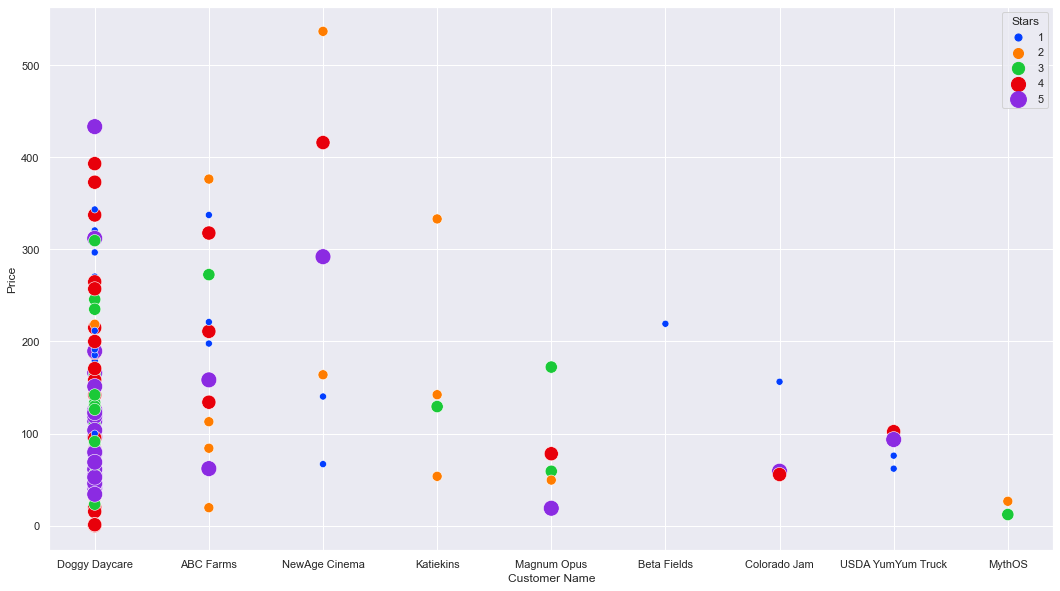

In [11]:
# Create data visualization
fig = plt.gcf()
fig.set_size_inches(18, 10)
sns.set_theme(style = "darkgrid")
sns.scatterplot(x = "Customer Name", y = "Price", hue = "Stars", size = "Stars", sizes = (50,250), palette = "bright", data = logbook_df)

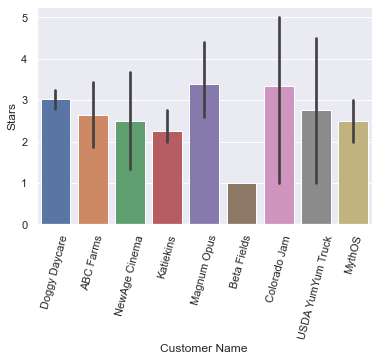

In [12]:
# Plot the average number of stars by customer with error bars
sns.barplot(x = "Customer Name", y = "Stars", data = logbook_df)
plt.xticks(rotation = 75)
plt.show()